# Tensorflow Tutorial

### Setup using Virtual Environments

Virtual environments are a great way to package your dependencies for different projects. You will be using them a lot in the future so we highly reccommend setting up a virtual environment for this homework. If you are unfamiliar with using virtual environments, follow the following instructions for setting up a virtual environment using **Anaconda**.


This is optional but highly reccommended and it will make development in the future much easier. If you get stuck on this part, just move on.

0. If you don't already have Anaconda, install it here: https://www.anaconda.com/distribution/#macos
1. Create the environment by running: `conda create -n nmep python=3.6`
2. Enter the virtual environment: `conda activate nmep`
    
    **NOTE: If you get a `CommandNotFoundError`, you can run `conda init bash` and then open a new window.**
    
    
3. Install tensorflow in your environment: `conda install -c conda-forge tensorflow`
4. Install Keras: `conda install -c conda-forge keras`
5. Installing your Virtual Env as a jupyter kernel: 
    1. `pip install --user ipykernel`
    2. `python -m ipykernel install --user --name=nmep`
    3. In the menu bar of the jupyter notebook go to `Kernel > Change Kernel` and select `nmep`
6. To deactivate your environment: `conda deactivate`

### Let's Get Started!
This homework is going to require a lot of reading to truly understand what tensorflow is and how it works. Please put in the time right now to fully understand what is going on because it will only help you in the future! It is also super important that you learn how to use tensorflow for next weeks homework (which will be very difficult).

#### So.... What is Tensorflow?
Tensorflow is an open-source ML framework created by Google that makes it super easy to build and train models in python. Tensorflow is a low level library which makes it very flexible. It also provides functionality for distributed training and data loading (among other things) to make training your models as efficient as possible. There are also other libraries including keras and pytorch that you will likely encounter as you read and write ML code. 

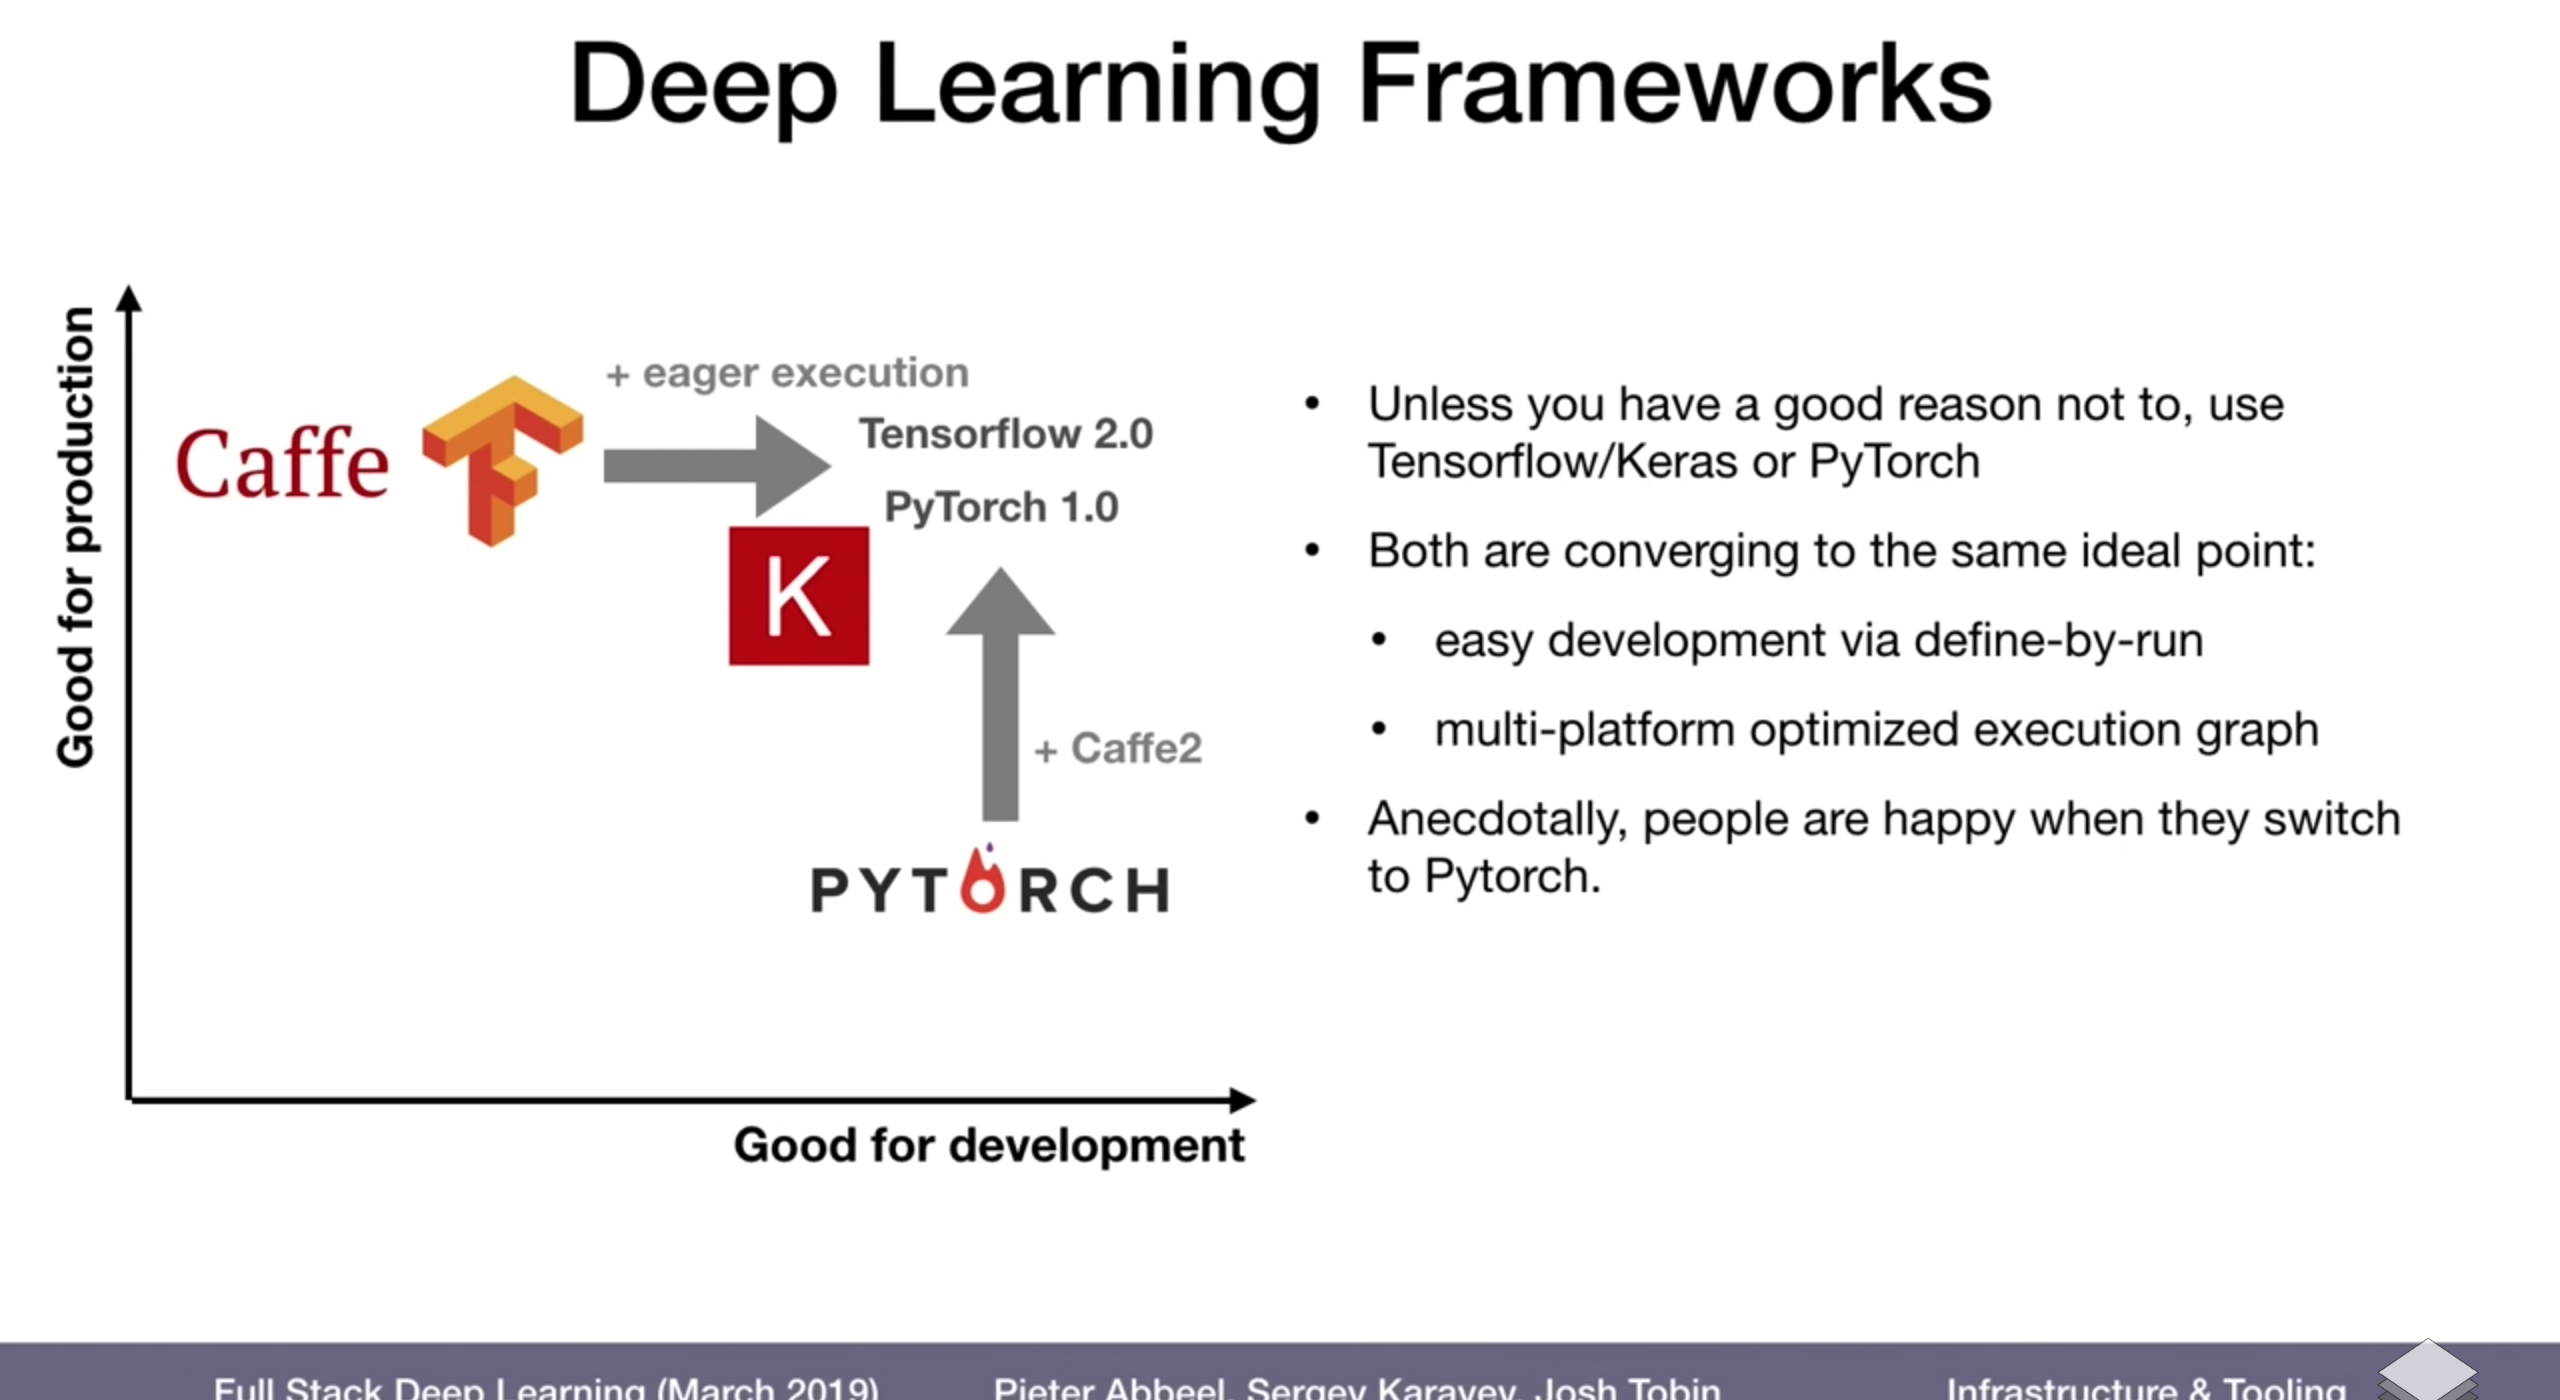

### Intro to Tensorflow
BEFORE YOU GET STARTED please read the following excellent articles on how tensorflow works. This is one of the best articles on Tensorflow I've read so go through it THOROUGHLY:
1. https://jacobbuckman.com/2018-06-25-tensorflow-the-confusing-parts-1/
2. https://jacobbuckman.com/2018-09-17-tensorflow-the-confusing-parts-2/

#### Lets build our first Neural Network

In [ ]:
#Import the necessary libraries
import os
#Disable the warnings for now cuz they are annoying
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

#### Build our tensorflow graph

Essentially, TensorFlow computation graph contains the following parts:

1. **Placeholders**: variables used in place of inputs to feed to the graph
2. **Variables**: model variables that are going to be optimized to make model perform better
3. **Model**: a mathematical function that calculates output based on placeholder and model variables
4. **Loss Measure**: guide for optimization of model variables
5. **Optimization Method**: update method for tuning model variables

These are all taken from the following article. If you are confused about any of these components, I would highly reccommend taking a look at this:

*Source: https://deepnotes.io/tensorflow*

<b>Placeholders: </b>
https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/placeholder

We will be using placeholders to feed the data into our graph. We will be using the MNIST dataset which as 28x28 black and white images and 10 labels (one for each digit). 

1. We have created a X placeholder with the appropriate shape [batch_size, num_features]
2. TODO: Create a Y placeholder with the appropriate shape [batch_size, num_features]

<p> We generally set the first dimension as `None` to allow batch sized to be a variable.

In [ ]:
tf.reset_default_graph()
#PLACEHOLDERS
X = tf.placeholder(shape=[None, 784], dtype=tf.float32, name="X") #why is the number of features 784?
Y = ...

<b>Variables and Model:</b>
1. The first layer is given to you. It creates a weights variable node of size [input, 256] (256 neurons in the first hidden layer) and a bias variable for each neuron. The weights will be intialized (pre-training) by sampling from a truncated normal distribution. The bias is intialized with the constant 0.1.
3. TODO: Multiply your input with the weights matrix, add the bias. ReLU the result. 
4. TODO: Repeat a similar process for another layer with 256 neurons
5. TODO: Repeat a similar process for the output layer. How many neurons should this layer have? 

In [ ]:
#MODEL --> This will be a shallow network because we don't want our laptops to explode. :)

W1 = tf.get_variable("Weights1", initializer=tf.truncated_normal([784, 256]))
b1 = tf.get_variable("bias1", initializer=tf.constant(0.1, shape=[1, 256]))
layer1 = ...  # [256, 784] * [784, 1] + [256, 1]


W2 = ...
b2 = ...
layer2 = ...

W_out = ...
b_out = ...
logits = ...

What are logits?: 

```
"the vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class."
```

*Source: https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow*

<b> Loss Measure: </b>
1. TODO: Calculate the entropy by using tensorflow's softmax cross entropy with logits function
2. TODO: Calculate the loss by taking the average of the entropy over all samples. See `tf.reduce_mean`

In [ ]:
#LOSS MEASURE
entropy = ...
loss = ...

<b> Optimization Method: </b>

This part defines an optimizer and learning rate and creates an operation in the graph to minimize the loss that we defined earlier. This is where the learning (gradient computation and weight updates) happen. 

In [ ]:
#OPTIMIZATION METHOD
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer.minimize(loss)

Compute the accuracy by finding the softmax over the output logits and comparing this to the labels. The accuracy computation is done for you, but you should understand what is happening and be able to reproduce it.

In [ ]:
#CALCULATE METRICS
Y_pred = ...
y_pred_cls = ...
y_cls = ...
accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred_cls, y_cls), tf.float32))

#### Tensorboard
Tensorboard is a useful tools that allows us to visualize our computation graph and plot various metrics such as loss and accuracy. It is very important to be familiar with how to use tensorboard.

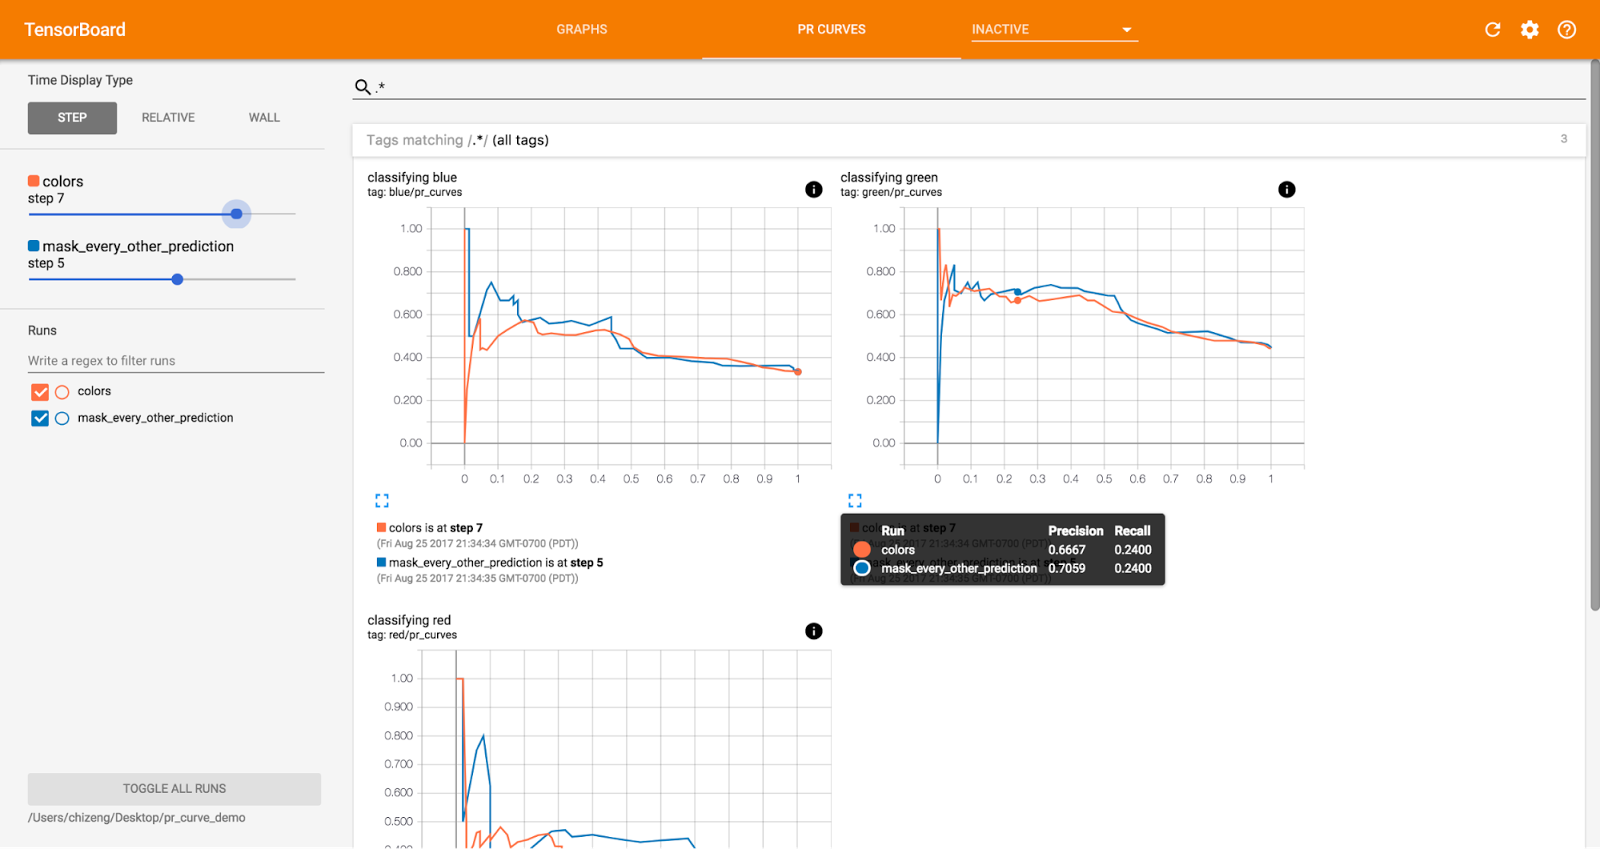

In [ ]:
#UNDERSTAND WHAT IS GOING ON HERE
tf.summary.scalar('loss', loss)
tf.summary.scalar('accuracy', accuracy)
tf.summary.histogram('Weights_1', W1)
tf.summary.histogram('Bias_1', b1)
tf.summary.histogram('Weights_2', W2)
tf.summary.histogram('Bias_2', b2)
tf.summary.histogram('Weights_out', W_out)
tf.summary.histogram('Bias_out', b_out)

In [ ]:
summary_op = tf.summary.merge_all()

#### Start Tensorflow Session
Here we are creating a session and intializing the variables with the specified `initializer` parameter. 

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#### Loading the Data
Since our dataset is small enough we will be loading all the data into memory; however, in reality if you are working with a large dataset/larges images, you will have to batch your data and read each batch from disk during every training loop...more on this later.

Tensorflow provides a convenient interface for MNIST data. This makes it really easy to test your code on a dataset that is commonly used. The code below shows you how to read MNIST images and store the labels as one-hot vectors.

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
MNIST = input_data.read_data_sets("../data/mnist", one_hot = True)
print(MNIST)

#### Implementing the Training Loop with `feed_dict`
Run `tensorboard --logdir=logs/train` to open up tensorboard after you have started training. If you would like to include multiple training runs in tensorboard (and save the data for each run), you must save the logs for each run in a separate subfolder.

In [ ]:
batch_size = 128
epochs = 5
run_number = 1
writer = tf.summary.FileWriter('logs/train/run{0}'.format(run_number), graph=tf.get_default_graph())
n_batches = (int) (MNIST.train.num_examples/batch_size)
for i in range(epochs):
    total_loss = 0
    for batch in range(n_batches):
        X_batch, y_batch = MNIST.train.next_batch(batch_size)
        #THIS LINE IS IMPORTANT, UNDERSTAND WHAT IS HAPPENING HERE
        o, l, summary = sess.run([optimizer, loss, summary_op], feed_dict={X: X_batch, Y: y_batch})
        total_loss += l
        writer.add_summary(summary, i*n_batches + batch)
    print("Epoch {0}: {1}".format(i, total_loss))
    if i%5 == 0 and i!= 0:
        X_val, y_val = MNIST.validation.next_batch(MNIST.validation.num_examples)
        val_accuracy = sess.run(accuracy, feed_dict={X: X_val, Y: y_val})
        print("\tVal Accuracy {0}".format(val_accuracy))

#### Evaluating the Model

In [ ]:
print("Computing accuracy ...")
X_batch, y_batch = MNIST.test.next_batch(MNIST.test.num_examples)
#TODO: Which operations should you be performing during inference?
final_accuracy = sess.run(...)

print ("Test Accuracy {0}".format(final_accuracy))

#### Optimizations using tf.Data!

`tf.Data` is a tensorflow library that allows you to build efficient data pipelines. It prevents the use of `feed_dict` which is actually a major bottleneck when training tensorflow models. You will have more experience actually using tf.Data in the next homework, but please complete the following readings to familiarize yourself with how it works:


#### Save and restore models
When we are training, it is very important that we periodically checkpoint our model (save the weights to disk). In this case we will only be saving the weights after we finish training; however, in practice you should be doing it after each training epoch (depending on how long training takes). 


**Reading:**
https://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/

In [ ]:
#INITIALIZE A SAVER (See tensorflow documentation)
saver = ...

In [ ]:
#SAVE YOUR MODEL WEIGHTS AND GRAPH
saver.save(...)

In [ ]:
tf.reset_default_graph()

#IMPORT THE GRAPH from .meta
saver = ...

#RESTORE THE WEIGHTS FROM THE LATEST CHECKPOINT (use tf.compat.v1.train.latest_checkpoint)
checkpoint = ...
saver.restore(...)

#YOU SHOULD SEE A LIST OF YOUR ENTIRE MODEL PRINTED HERE
graph = tf.get_default_graph()
for op in graph.get_operations():
    print(str(op.name))

Congrats!! You (hopefully) now know the basics of how to use tensorflow. Of course, the best way to learn is to practice! In the next homework you will be implementing an autoencoder using tensorflow! Wooooo!